# 1. SVM Classification with Scikit-Learn:

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

# Create an SVM classifier with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

Kernel: linear, Accuracy: 1.0
Kernel: poly, Accuracy: 1.0
Kernel: rbf, Accuracy: 0.9333333333333333
Kernel: sigmoid, Accuracy: 0.2


# 2. Visualizing Data Classification with Different Kernels:

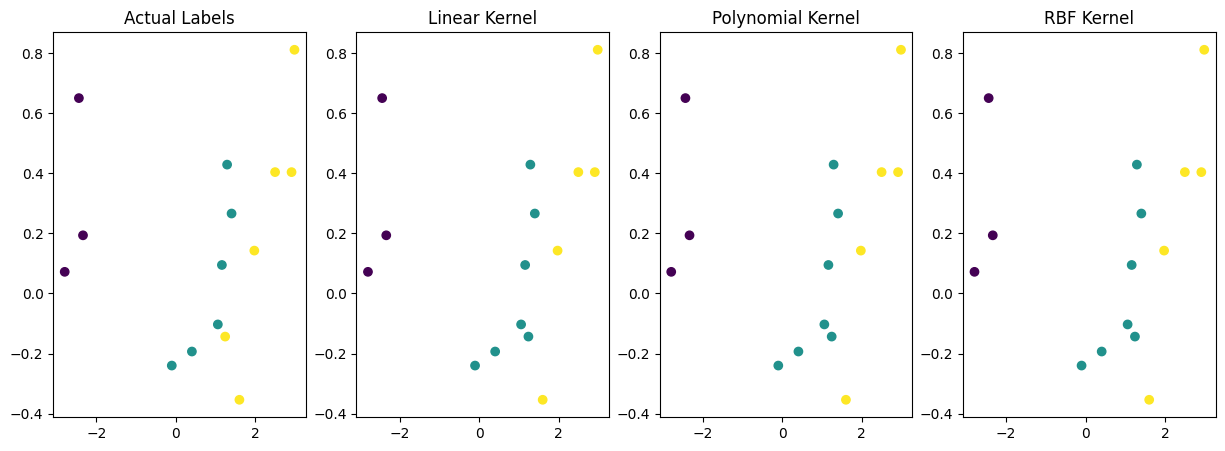

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf')
svm_sigmoid = SVC(kernel='sigmoid')

svm_linear.fit(X_train_pca, y_train)
svm_poly.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)
svm_sigmoid.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test_pca)
y_pred_poly = svm_poly.predict(X_test_pca)
y_pred_rbf = svm_rbf.predict(X_test_pca)
y_pred_sigmoid = svm_sigmoid.predict(X_test_pca)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
plt.title("Actual Labels")

plt.subplot(1, 4, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_linear)
plt.title("Linear Kernel")

plt.subplot(1, 4, 3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_poly)
plt.title("Polynomial Kernel")

plt.subplot(1, 4, 4)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_rbf)
plt.title("RBF Kernel")

plt.show()

# 3. Different Types of Kernels and Kernel Selection:

## Linear Kernel:

- Simplest kernel, suitable for linearly separable data.
- Computes the dot product between data points.

## Polynomial Kernel:
- Introduces a polynomial transformation to the data, allowing for nonlinear decision boundaries.
- Parameters: degree (polynomial order), coef0 (constant term).

## Radial Basis Function (RBF) Kernel:
- Most commonly used kernel, suitable for nonlinearly separable data.
Computes a Gaussian radial basis function centered at each data point.
- Parameter: gamma (inverse bandwidth).

## Sigmoid Kernel:
- Similar to the logistic function, often used in neural networks.
- Parameters: coef0 (constant term), gamma (scale).

## Choosing the Appropriate Kernel:

1. Linearly Separable Data: Use the linear kernel for simplicity and efficiency.
2. Nonlinearly Separable Data: Experiment with polynomial, RBF, and sigmoid kernels to find the best fit.
3. Consider Computational Cost: The polynomial and RBF kernels can be computationally expensive for large datasets.
4. Start with RBF: RBF is often a good starting point due to its flexibility.
5. Tune Hyperparameters: Use techniques like grid search or random search to find optimal hyperparameter values for each kernel.
6. Cross-Validation: Evaluate the performance of different kernels using cross-validation to avoid overfitting.